In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

In [4]:
TRAIN_DATASET_PATH = 'CourseWork/train.csv'
TEST_DATASET_PATH = 'CourseWork/test.csv'
PREPARED_X_TRAIN_DATASET_PATH = 'CourseWork/x_train_prepared_iter3.csv'
PREPARED_Y_TRAIN_DATASET_PATH = 'CourseWork/y_train_prepared_iter3.csv'
PREPARED_TEST_DATASET_PATH = 'CourseWork/test_prepared_iter3.csv'

In [5]:
X = pd.read_csv(TRAIN_DATASET_PATH)
X_test = pd.read_csv(TEST_DATASET_PATH)

In [6]:
X.set_index('Id', inplace=True)
X_test.set_index('Id', inplace=True)

In [7]:
y = X['Price'].copy()
X = X.drop(['Price'], axis=1).copy()

In [11]:
X = pd.concat([X, X_test], axis=0)

In [12]:
X.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B


In [13]:
X.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,15000.000000,15000.000000,15000.000000,11846.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,7825.000000,15000.000000,15000.000000
mean,50.693600,1.897000,56.360350,36.851792,6.174467,8.561800,12.606600,3.321575e+03,0.119196,24.769267,5370.404933,8.113667,1144.162428,1.319467,4.235133
std,43.786257,0.839229,20.423913,71.120183,24.016979,5.323113,6.780165,1.637078e+05,0.119371,17.532278,4013.364403,23.841946,1029.296278,1.489012,4.796545
min,0.000000,0.000000,1.136859,0.333490,0.000000,1.000000,0.000000,1.908000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,41.814371,22.896130,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,37.000000,2.000000,52.645757,32.822810,6.000000,7.000000,12.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,75.000000,2.000000,66.036608,45.144624,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000
max,212.000000,19.000000,641.065193,7480.592129,2014.000000,78.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 14038 to 12504
Data columns (total 18 columns):
DistrictId       15000 non-null int64
Rooms            15000 non-null float64
Square           15000 non-null float64
LifeSquare       11846 non-null float64
KitchenSquare    15000 non-null float64
Floor            15000 non-null int64
HouseFloor       15000 non-null float64
HouseYear        15000 non-null int64
Ecology_1        15000 non-null float64
Ecology_2        15000 non-null object
Ecology_3        15000 non-null object
Social_1         15000 non-null int64
Social_2         15000 non-null int64
Social_3         15000 non-null int64
Healthcare_1     7825 non-null float64
Helthcare_2      15000 non-null int64
Shops_1          15000 non-null int64
Shops_2          15000 non-null object
dtypes: float64(7), int64(8), object(3)
memory usage: 2.2+ MB


In [15]:
X.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       3154
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     7175
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

In [16]:
features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AF6EEEE80>,
      dtype=object)

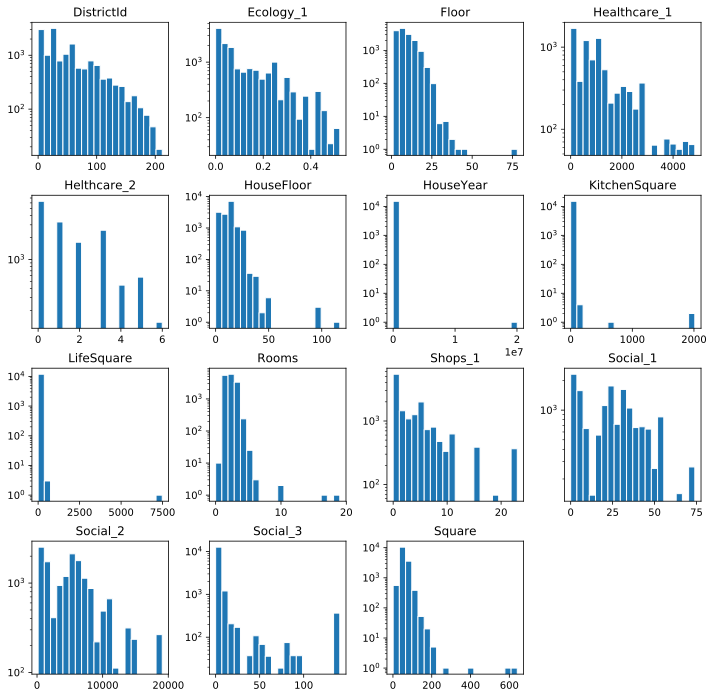

In [17]:
X.select_dtypes(include=['int64', 'float64']).hist(figsize=(12, 12), bins=20, grid=False, edgecolor='white', log=True)

Text(0.5, 1.0, 'Correlation matrix')

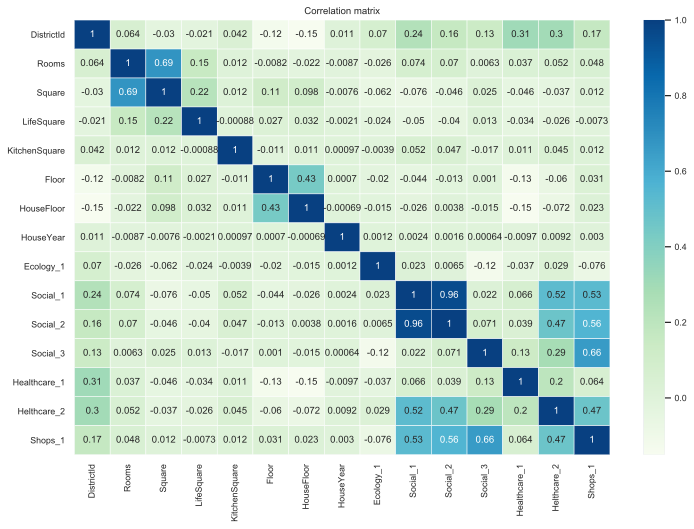

In [18]:
plt.figure(figsize=(12, 8))

sns.set(font_scale=0.8)
sns.heatmap(X.select_dtypes(include=['int64', 'float64']).corr(), annot=True, linewidths=0.5, cmap='GnBu')

plt.title('Correlation matrix')

### Рассмотрим целевую переменную 'Price'

In [21]:
y.describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

(array([ 917., 2792., 3168., 1434.,  731.,  437.,  254.,  154.,   72.,
          41.]),
 array([ 59174.77802758, 116580.64688182, 173986.51573605, 231392.38459029,
        288798.25344453, 346204.12229876, 403609.991153  , 461015.86000724,
        518421.72886147, 575827.59771571, 633233.46656995]),
 <a list of 10 Patch objects>)

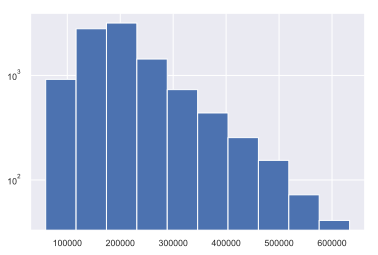

In [22]:
plt.hist(y, bins=10, edgecolor='white', log=True)

### Рассмотрим признак 'Square'

In [23]:
X['Square'].describe()

count    15000.000000
mean        56.360350
std         20.423913
min          1.136859
25%         41.814371
50%         52.645757
75%         66.036608
max        641.065193
Name: Square, dtype: float64

(array([1.800e+01, 5.700e+01, 9.730e+02, 3.135e+03, 2.904e+03, 1.957e+03,
        1.998e+03, 1.350e+03, 9.710e+02, 1.008e+03, 3.310e+02, 1.360e+02,
        9.000e+01, 2.700e+01, 2.300e+01, 1.800e+01, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([ 13.78486476,  20.99442659,  28.20398841,  35.41355023,
         42.62311206,  49.83267388,  57.04223571,  64.25179753,
         71.46135936,  78.67092118,  85.880483  ,  93.09004483,
        100.29960665, 107.50916848, 114.7187303 , 121.92829212,
        129.13785395, 136.34741577, 143.5569776 , 150.76653942,
        157.97610125]),
 <a list of 20 Patch objects>)

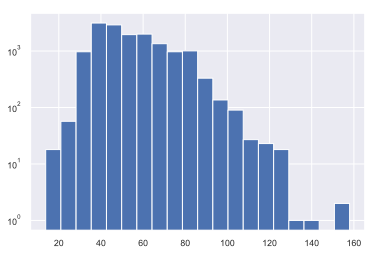

In [38]:
plt.hist(X['Square'], bins=20, edgecolor='white', log=True)

In [39]:
X[(X['Square'] < 10)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,


In [40]:
X[(X['Square'] > 170)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

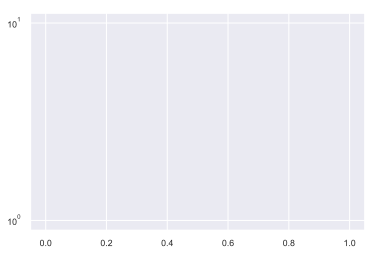

In [41]:
plt.hist(X.loc[(X['Square'] < 10) | (X['Square'] > 170), 'Square'], bins=20, edgecolor='white', log=True)

In [28]:
def square_normalize_on_district(df):
    distr_list = sorted(df['DistrictId'].unique())
    for distr in distr_list:
        IQ = df.loc[df['DistrictId'] == distr, 'Square'].describe()['75%'] - df.loc[df['DistrictId'] == distr, 'Square'].describe()['25%']
        lowBorder = df.loc[df['DistrictId'] == distr, 'Square'].describe()['25%'] - IQ * 1.5
        median_square = df.loc[df['DistrictId'] == distr, 'Square'].describe()['50%']
        highBorder = df.loc[df['DistrictId'] == distr, 'Square'].describe()['75%'] + IQ * 1.5
        df.loc[(df['DistrictId'] == distr) & (~df['Square'].between(lowBorder, highBorder)), 'Square'] = median_square

In [29]:
square_normalize_on_district(X)

In [31]:
IQ = X['Square'].describe()['75%'] - X['Square'].describe()['25%']
lowBorder = X['Square'].describe()['25%'] - IQ * 1.5
median_square = X['Square'].describe()['50%']
highBorder = X['Square'].describe()['75%'] + IQ * 1.5

(array([51., 32., 23., 12.,  8.,  6.,  9., 12.,  8.,  6.,  0.,  1.,  0.,
         1.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([ 99.61490633, 102.53296607, 105.45102582, 108.36908557,
        111.28714531, 114.20520506, 117.1232648 , 120.04132455,
        122.95938429, 125.87744404, 128.79550379, 131.71356353,
        134.63162328, 137.54968302, 140.46774277, 143.38580252,
        146.30386226, 149.22192201, 152.13998175, 155.0580415 ,
        157.97610125]),
 <a list of 20 Patch objects>)

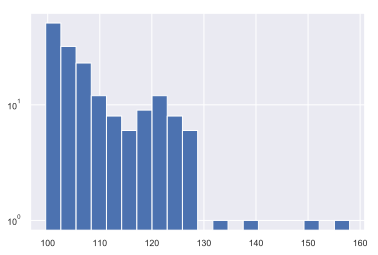

In [42]:
plt.hist(X.loc[(~X['Square'].between(lowBorder, highBorder)), 'Square'], bins=20, edgecolor='white', log=True)

In [35]:
X.loc[(X['Square'] < 10)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,


In [34]:
X.loc[(X['Square'] < 10), 'Square'] = X.loc[(X['Square'] < 10), 'Square'] * 10
X.loc[(X['Square'] < 4), 'Square'] = X.loc[(X['Square'] < 4), 'Square'] * 2

In [37]:
X['Square'].describe()

count    15000.000000
mean        54.962954
std         16.521119
min         13.784865
25%         41.846597
50%         51.933226
75%         64.928300
max        157.976101
Name: Square, dtype: float64

### Признак 'Rooms'

In [43]:
X['Rooms'].value_counts()

2.0     5910
1.0     5474
3.0     3334
4.0      240
5.0       25
0.0       10
6.0        3
10.0       2
19.0       1
17.0       1
Name: Rooms, dtype: int64

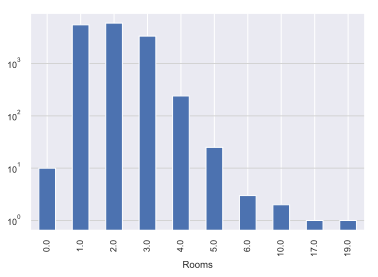

In [44]:
X.groupby('Rooms')['Rooms'].count().plot(kind='bar', logy=True)
plt.grid(axis='y', color='lightgray')

In [45]:
X.loc[X['Rooms'] == 0]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
12638,27,0.0,55.477945,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B
7917,27,0.0,55.477945,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B
7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B
456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
3224,27,0.0,55.477945,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B
9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3343,58,0.0,53.041446,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B


### 'Rooms' == 0

In [46]:
X.loc[X['Rooms'] == 19, 'Rooms'] = 2

In [47]:
X.loc[12638, 'Rooms'] = 2
X.loc[7317, 'Rooms'] = 1
X.loc[770, 'Rooms'] = 1
X.loc[456, 'Rooms'] = 2
X.loc[3159, 'Rooms'] = 1
X.loc[9443, 'Rooms'] = 2
#X.loc[8491, 'Rooms'] = 1
X.loc[5927, 'Rooms'] = 2
X.loc[14865, 'Rooms'] = 2

X.loc[3343, 'Rooms'] = 1
X.loc[10729, 'Rooms'] = 2
X.loc[1435, 'Rooms'] = 2

In [87]:
X.drop([7917, 3224], inplace=True) # я точно знаю, что эти индексы не из X_test

KeyError: '[7917 3224] not found in axis'

In [88]:
y = pd.DataFrame(y, columns=['Price'])
y.drop([7917, 3224], inplace=True)

In [49]:
X.loc[X['Rooms'].isin([0, 10, 19])]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,


### 'HouseFloor' == 99 | 'HouseFloor' == 117 | 'HouseFloor' == 0

In [50]:
X.loc[X['HouseFloor'] == 117, 'HouseFloor'] = 17
X.loc[10806, 'HouseFloor'] = 9
X.loc[9300, 'HouseFloor'] = 9

X.loc[15864, 'HouseFloor'] = 19

In [51]:
X.loc[X['HouseFloor'].isin([99, 117])]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,


In [52]:
X.loc[(X['HouseFloor'] == 0), 'HouseFloor'] = X.loc[(X['HouseFloor'] == 0), 'Floor']

In [53]:
X.loc[(X['HouseFloor'] == 0)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,


### 'HouseFloor' < 'Floor'

In [54]:
X.loc[X['HouseFloor'] < X['Floor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,NaN,0,0,B
11935,27,2.0,64.711835,NaN,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
6486,200,3.0,85.280389,58.447967,9.0,6,5.0,1960,0.000000,B,B,33,7425,1,NaN,2,5,B
10103,94,1.0,35.280894,23.354176,6.0,11,9.0,1971,0.282798,B,B,33,8667,2,NaN,0,6,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15181,27,4.0,55.477945,66.903563,1.0,4,1.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B
16064,30,1.0,38.376234,37.003311,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
2591,39,2.0,44.203592,30.191691,6.0,10,9.0,1972,0.428826,B,B,25,5011,8,730.0,0,2,B


(array([2898., 2839., 2897., 4628., 1081.,  582.,   35.,   10.,   20.,
           8.]),
 array([ 1. ,  5.7, 10.4, 15.1, 19.8, 24.5, 29.2, 33.9, 38.6, 43.3, 48. ]),
 <a list of 10 Patch objects>)

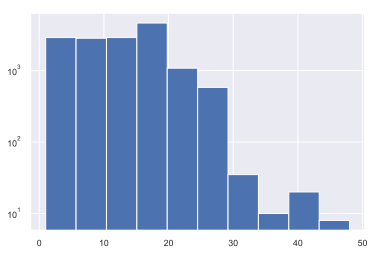

In [55]:
plt.hist(X['HouseFloor'], edgecolor='white', log=True)

In [56]:
X.loc[X['HouseFloor'] < X['Floor'], 'HouseFloor'] = X.loc[X['HouseFloor'] < X['Floor'], 'Floor']

### Замена значений 'NaN' признака 'Healthcare_1'

In [57]:
X.loc[X['Healthcare_1'].isna()]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B
14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B
11993,74,2.0,80.312926,NaN,0.0,14,14.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7220,96,3.0,80.182493,48.627326,10.0,10,17.0,2003,0.041116,B,B,53,14892,4,NaN,1,4,B
8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B


In [58]:
distr = sorted(list(X['DistrictId'].unique()))
for i in distr:
    median = X.loc[(X['DistrictId'] == i) & (X['Healthcare_1'].notna()), 'Healthcare_1'].median()
    X.loc[(X['DistrictId'] == i) & (~X['Healthcare_1'].notna()), 'Healthcare_1'] = median

(array([4501., 2170., 2472.,  627., 1073.,  842.,  132.,  115.,  139.,
         136.]),
 array([   0. ,  484.9,  969.8, 1454.7, 1939.6, 2424.5, 2909.4, 3394.3,
        3879.2, 4364.1, 4849. ]),
 <a list of 10 Patch objects>)

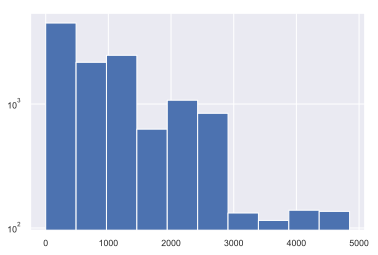

In [59]:
plt.hist(X.loc[X['Healthcare_1'].notna(), 'Healthcare_1'], edgecolor='white', log=True)

In [60]:
X.loc[X['Healthcare_1'].isna(), 'DistrictId'].value_counts()

27     1240
34      172
45      165
94      132
25      119
96      113
67      104
12      100
88      100
18       77
10       72
42       60
83       53
15       49
35       36
151      23
36       19
92       19
187      16
176      13
127      13
154      12
68       12
164      11
191      10
173       9
131       8
112       7
200       7
149       7
65        6
201       3
205       2
210       1
117       1
Name: DistrictId, dtype: int64

In [61]:
health_median = X['Healthcare_1'].median()
health_median

750.0

In [62]:
X.loc[X['Healthcare_1'].isna(), 'Healthcare_1'] = health_median

In [63]:
X.loc[X['Healthcare_1'].isna()]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,


In [64]:
X.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       3154
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1        0
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

### Разбираемся с годами постройки домов

In [65]:
print(sorted(X['HouseYear'].unique()))

[1908, 1909, 1910, 1911, 1912, 1914, 1916, 1917, 1918, 1919, 1920, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 4968, 20052011]


In [67]:
X.loc[~X['HouseYear'].between(1900, 2030)]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
Id,,,,,,,,,,,,,,,,,,
10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B
11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B


In [68]:
X.loc[X['HouseYear'] == 20052011, 'HouseYear'] = 2011
X.loc[X['HouseYear'] == 4968, 'HouseYear'] = 1968

### Разберёмся с категориальными признаками

In [69]:
X.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
dtype: object

In [70]:
X['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [71]:
X['Ecology_2'].value_counts()

B    14853
A      145
Name: Ecology_2, dtype: int64

In [72]:
X['Ecology_3'].unique()

array(['B', 'A'], dtype=object)

In [73]:
X['Ecology_3'].value_counts()

B    14574
A      424
Name: Ecology_3, dtype: int64

In [74]:
X['Shops_2'].unique()

array(['B', 'A'], dtype=object)

In [75]:
X['Shops_2'].value_counts()

B    13761
A     1237
Name: Shops_2, dtype: int64

In [76]:
X = pd.get_dummies(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 14038 to 12504
Data columns (total 21 columns):
DistrictId       14998 non-null int64
Rooms            14998 non-null float64
Square           14998 non-null float64
LifeSquare       11844 non-null float64
KitchenSquare    14998 non-null float64
Floor            14998 non-null int64
HouseFloor       14998 non-null float64
HouseYear        14998 non-null int64
Ecology_1        14998 non-null float64
Social_1         14998 non-null int64
Social_2         14998 non-null int64
Social_3         14998 non-null int64
Healthcare_1     14998 non-null float64
Helthcare_2      14998 non-null int64
Shops_1          14998 non-null int64
Ecology_2_A      14998 non-null uint8
Ecology_2_B      14998 non-null uint8
Ecology_3_A      14998 non-null uint8
Ecology_3_B      14998 non-null uint8
Shops_2_A        14998 non-null uint8
Shops_2_B        14998 non-null uint8
dtypes: float64(7), int64(8), uint8(6)
memory usage: 2.5 MB


In [77]:
X.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
Id,,,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,...,5,750.0,0,11,0,1,0,1,0,1
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,...,1,240.0,1,16,0,1,0,1,0,1
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,...,0,229.0,1,3,0,1,0,1,0,1
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,...,3,1084.0,0,5,0,1,0,1,0,1
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,...,1,2078.0,2,4,0,1,0,1,0,1


In [82]:
X_test = X.loc[X.index.isin(X_test.index)]

In [84]:
X = X.loc[~X.index.isin(X_test.index)]

In [89]:
X.to_csv(PREPARED_X_TRAIN_DATASET_PATH)
y.to_csv(PREPARED_Y_TRAIN_DATASET_PATH)

X_test.to_csv(PREPARED_TEST_DATASET_PATH)